<a href="https://colab.research.google.com/github/obeshor/diagnose-epileptic-seizures/blob/main/Seizure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# &#128204; Intro Of This Notebook
The aim of this study is to diagnose epileptic seizures by using different machine learning algorithms. For this purpose, the frequency components of the EEG are extracted by using the discrete wavelet transform (DWT) and parametric  methods based on autoregressive (AR) model. We use ANN, CNN and LSTM

# &#128225; Introduction Of Epileptic
Epilepsy is a serious brain illness that is an endemic neurological disorder all over  the world. It is a clinical result that occurs with abnormal neurological electrical  discharging of brain. Epileptic seizures represent the most common positive signs and  symptoms of brain disturbance, and epilepsy is one of the most common primary  brain disorders . Vascular causes, traumatic causes, infections and brain abscesses,  brain tumors, nutritional deficiencies, pyridoxine deficiency, calcium metabolism  disorders are lead causes for epilepsy. For in diagnosing epilepsy, research is needed  for better understanding of mechanisms causing epileptic disorders. The evaluation  and treatment of neurophysiologic disorders are diagnosed with the  electroencephalogram [EEG]. EEG is crucial for accurate classification of different  forms of epilepsy .

# Theoretical Background
The aim of this study is to contribute to the diagnosis of epilepsy by taking advantage of the engineering. So, for diagnosing of epileptic seizures from EEG signals are transformed discrete wavelet and auto regressive models.

# EEG Data Recording
EEG signals are separated into α, β, δ and θ spectral components and provide a  wide range of frequency components. EEG spectrum contains some characteristic  waveforms that fall primarily within four frequency bands as follows: δ(0.5-4 Hz),  θ(4-8 Hz), α(8-13 Hz), and β (13- 30 Hz) .
EEG data set has acquired different age groups in this study. They are known  epileptic with uncontrolled seizures and are admitted to the neurology department of the Medical Faculty Hospital of Dicle University1. For this system LabView pro-  gramming language has been used  and the EEG data used in 400 people who re-  ceived 200 of them are epilepsy and with 200 of them are normal. Data set represents  of signals belong to several healthy and epileptic patients. The EEG signals that are  contained by PCI-MIO 16E DAQ card system that provides real time processing and  is a data bus of computer, signal processor and personal computer. Fig. 2 shows that  how to acquire EEG data from a patient [1]. EEG signals are to ensure the accuracy of  diagnosing disease that usually is taken 8-10 hours in the form of records. EEG sig-  nals are used in section and 23.6 seconds, 173 Hz sampling frequency is illustrated  with. International 10–20 electrode placement system according to the data collected,  12-bit analog-digital conversion after the samples are recorded subsequently. Data can  be passed through the filter 0.53–40 Hz band–pass, the EEG in the presence of clini-  cal interest for focusing range is provided. The EEG data used in our study were  downloaded from 24-h EEG recorded from both epileptic patients and normal sub-  jects. The following bipolar EEG channels were selected for analysis: F7-C3, F8-C4,  T5-O1 and T6-O2. In order to assess the performance of the classifier, we selected  500 EEG segments containing spike and wave complex, artifacts and background  normal EEG .
![Imgur](https://i.imgur.com/6rQgYS9.png)

# Discrete Wavelet Transform
Wavelet transform is more advantageous spectral analyze method than other  spectral analyze methods on non-stationary signals. Because the wavelet transform  method changes large low-frequency, high frequency that is narrow for the window  size. So, the entire frequency range can be achieved in the optimum time-frequency  resolution [22] Continuous and discrete wavelet transform is analyzed in the scale and  variation of parameters due to the continuous wavelet coefficients for each scale is  difficult and time consuming. For this reason, discrete wavelet transform is used more
ften than these non-stationary signals. Wavelet scale is divided into a number of  points for x[n] process as seen in Fig. 2 that is called multi resolution decomposition.  It is important that is selected appropriate wavelet decomposition level, the number of  detection and wavelet transform analysis of signals. Because of classification accura-  cy is dependent on type of wavelet, dominant frequency components of signals are  determined according to the number of decomposition levels.
Wavelet coefficients contain important information about EEG signal that provide  extraction of feature vector. Statistical-time frequency of EEG signals sequences are:

The average of the absolute value of coefficients in each sub-band.
The maximum absolute value of coefficients in each sub-band.
The mean force coefficients of each sub-band.
Standard deviation of coefficients in each sub-band.
The average absolute value of the ratio of adjacent bands.
Distribution of breakdown coefficients in each sub-band.

1-3 sequence is signal characteristic; 4-6 sequence is that amount of frequency  change. This feature vector, of EEG signals that are used as inputs for multi-layer  neural network classification.
![Imgur](https://i.imgur.com/Jzj3UAU.png)

# Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports

import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input, LSTM
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import keras
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Set working directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Others/data')


# Data table display for Pandas dataframes
from google.colab import data_table

# Load the Dataset

In [ ]:
raw_data = pd.read_csv('Epileptic Seizure Recognition.csv')

# Read and Show Dataset
* The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.

* The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

* We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.

* So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

* The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

In [ ]:
raw_data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
raw_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
raw_data.shape

(11500, 180)

In [ ]:
data = raw_data.values
data = data[1:11500, 1:180]
data.shape

(11499, 179)

In [ ]:
# Classifying data categories
# Data source: https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition

D = data
df_1 = D[D[:, 178]==1]
df_2 = D[D[:, 178]==2]
df_3 = D[D[:, 178]==3]
df_4 = D[D[:, 178]==4]
df_5 = D[D[:, 178]==5]

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)

df_1 = df_1.astype(int)
df_2 = df_2.astype(int)
df_3 = df_3.astype(int)
df_4 = df_4.astype(int)
df_5 = df_5.astype(int)


(2300, 179)
(2300, 179)
(2300, 179)
(2299, 179)
(2300, 179)


As we can see, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).

Text(0.5, 0, 'Samples')

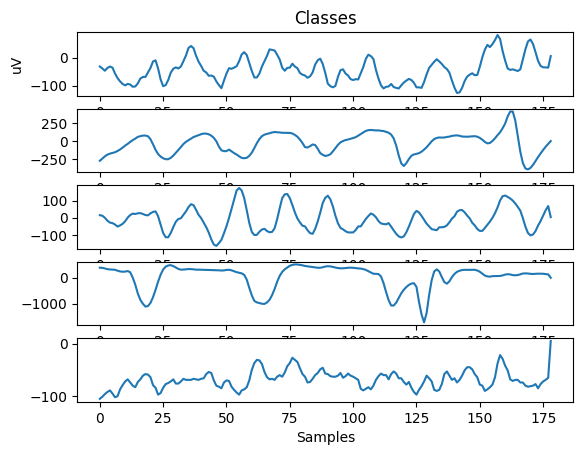

In [ ]:
plt.subplot(511)
plt.plot(data[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(data[7,:])
plt.subplot(513)
plt.plot(data[12,:])
plt.subplot(514)
plt.plot(data[0,:])
plt.subplot(515)
plt.plot(data[2,:])
plt.xlabel('Samples')

#  &#128223; Data Pre-processing

## What is Data Pre-pocessing?
![Imgur](https://i.imgur.com/HyPUqwF.png)
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
![Imgur](https://i.imgur.com/VuYZfho.jpg)

## &#128223; 1. Checking Missing Data

In [ ]:
raw_data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

###  &#128210; Note:
Thats great here is no missing value. So we can work very smoothly.

# &#128203; Exploratory Data Analysis

## &#128505; What is Exploratory data analysis?
![Imgur](https://i.imgur.com/HyPUqwF.png)
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

You can say that EDA is statisticians way of story telling where you explore data, find patterns and tells insights. Often you have some questions in hand you try to validate those questions by performing EDA. <b>I have one article on [EDA](https://hackernoon.com/overview-of-exploratory-data-analysis-with-python-6213e105b00b)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
X = raw_data.iloc[:,1:179].values
X.shape

(11500, 178)

In [ ]:
y = raw_data.iloc[:,179].values
y

array([4, 1, 5, ..., 5, 3, 4])

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [ ]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

# &#128295; Building Deep Learning Models

##  Splitting the Dataset into the Training set and Test set


In [ ]:
df_3[:, 178] = df_3[:, 178] - 3
D1 = np.concatenate([df_1, df_3])

In [ ]:
# Creating training (80), validation (10) and test (10) data from category 1 and 3
number_of_rows = D1.shape[0]

random_indices = np.random.choice(number_of_rows, size=int(number_of_rows*0.8), replace=False)

label_train = D1[random_indices, -1]
data_train = D1[random_indices, :-1]

D1_rest = np.delete(D1, random_indices, 0)

number_of_rows = D1_rest.shape[0]
random_indices = np.random.choice(number_of_rows, size=int(number_of_rows*0.5), replace=False)

label_val = D1_rest[random_indices, -1]
data_val = D1_rest[random_indices, :-1]

D1_rest_rest = np.delete(D1_rest, random_indices, 0)
label_test = D1_rest_rest[:, -1]
data_test = D1_rest_rest[:, :-1]

data_train = np.expand_dims(data_train, axis=2)
data_val = np.expand_dims(data_val, axis=2)
data_test = np.expand_dims(data_test, axis=2)

print(label_train.shape, data_train.shape)
print(label_val.shape, data_val.shape)
print(label_test.shape, data_test.shape)

(3680,) (3680, 178, 1)
(460,) (460, 178, 1)
(460,) (460, 178, 1)


# 1. Artificial Neural Networks(ANN)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Computers are great at solving algorithmic and math problems, but often the world can't easily be defined with a mathematical algorithm. Facial recognition and language processing are a couple of examples of problems that can't easily be quantified into an algorithm, however these tasks are trivial to humans. The key to Artificial Neural Networks is that their design enables them to process information in a similar way to our own biological brains, by drawing inspiration from how our own nervous system functions. This makes them useful tools for solving problems like facial recognition, which our biological brains can do easily.

## Modeling Artificial Neurons
Artificial neuron models are at their core simplified models based on biological neurons. This allows them to capture the essence of how a biological neuron functions. We usually refer to these artificial neurons as 'perceptrons'. So now lets take a look at what a perceptron looks like.
![Imgur](https://i.imgur.com/uvMRQ6R.jpg)
As shown in the diagram above a typical perceptron will have many inputs and these inputs are all individually weighted. The perceptron weights can either amplify or deamplify the original input signal. For example, if the input is 1 and the input's weight is 0.2 the input will be decreased to 0.2. These weighted signals are then added together and passed into the activation function. The activation function is used to convert the input into a more useful output. There are many different types of activation function but one of the simplest would be step function. A step function will typically output a 1 if the input is higher than a certain threshold, otherwise it's output will be 0.

## Implementing Artificial Neural Networks
So now you're probably wondering what an artificial neural network looks like and how it uses these artificial neurons to process information. In this tutorial we're going to be looking at feedforward networks and how their design links our perceptron together creating a functioning artificial neural network. Before we begin lets take a look at what a basic feedforward network looks like:
![Imgur](https://i.imgur.com/la4Rwn6.jpg)
Each input from the input layer is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer. Choosing the right number of nodes and layers is important later on when optimising the neural network to work well a given problem. As you can probably tell from the diagram, it's called a feedforward network because of how the signals are passed through the layers of the neural network in a single direction. These aren't the only type of neural network though. There are also feedback networks where its architecture allows signals to travel in both directions.

In [ ]:
# Define model evaluation function
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['1','2', '3']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
# Define ANN network
def network_ANN(X_train,y_train):
    im_shape=(X_train.shape[1],1)
    inputs_ann=Input(shape=(im_shape), name='inputs_ann')
    flatten = Flatten()(inputs_ann)

    dense = Dense(32, activation='relu' )(flatten)
    dense_1 = Dense(16, activation='relu' )(dense)

    main_output = Dense(2, activation='softmax')(dense_1)

    model1 = Model(inputs= inputs_ann, outputs=main_output)
    model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

    return(model1)

In [ ]:
# Define ANN model to be trained on epileptic vs healthy data
model1 = network_ANN(data_train,label_train)
print(model1.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_ann (InputLayer)     [(None, 178, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 178)               0         
                                                                 
 dense (Dense)               (None, 32)                5728      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 6,290
Trainable params: 6,290
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train CNN network on epileptic vs healthy data
# Save model at highest validation accuracy
save_path = '/tmp/checkpoint_1'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=save_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model1.fit(data_train, label_train,epochs=100, batch_size=32, validation_data=(data_val,label_val), callbacks=[model_checkpoint_callback])

Epoch 1/100
115/115 [==============================] - 7s 7ms/step - loss: 14.5470 - accuracy: 0.6519 - val_loss: 7.7601 - val_accuracy: 0.6848
Epoch 2/100
115/115 [==============================] - 0s 4ms/step - loss: 3.9488 - accuracy: 0.7470 - val_loss: 4.8116 - val_accuracy: 0.7087
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 2.0887 - accuracy: 0.8016 - val_loss: 3.6890 - val_accuracy: 0.7674
Epoch 4/100
115/115 [==============================] - 0s 4ms/step - loss: 1.4217 - accuracy: 0.8201 - val_loss: 3.3650 - val_accuracy: 0.7804
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 1.0609 - accuracy: 0.8397 - val_loss: 2.9371 - val_accuracy: 0.7739
Epoch 6/100
115/115 [==============================] - 0s 4ms/step - loss: 0.7454 - accuracy: 0.8587 - val_loss: 2.6201 - val_accuracy: 0.7891
Epoch 7/100
115/115 [==============================] - 0s 4ms/step - loss: 0.5888 - accuracy: 0.8622 - val_loss: 2.3339 - val_accuracy: 0.804

Accuracy: 91.09%


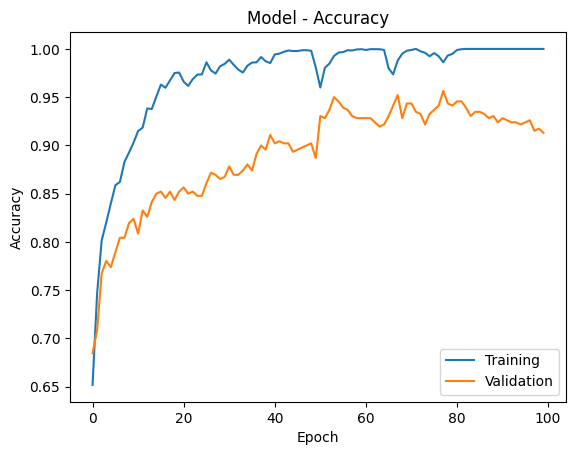

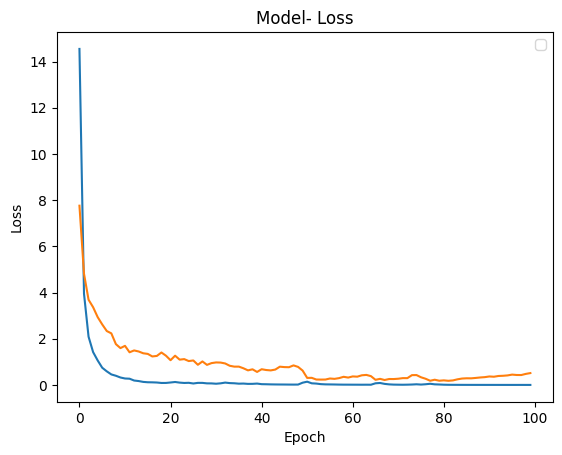

15/15 [==============================] - 0s 1ms/step


In [ ]:
# Print validation accuracy and plot accuracy and loss
evaluate_model(history,data_test,label_test,model1)
y_pred=model1.predict(data_test)

In [ ]:
scores = model1.evaluate((data_test),label_test, verbose=0)
acc_ANN = scores[1]


# 2. Convolutional Neural Networks(CNN)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Computers are great at solving algorithmic and math problems, but often the world can't easily be defined with a mathematical algorithm. Facial recognition and language processing are a couple of examples of problems that can't easily be quantified into an algorithm, however these tasks are trivial to humans. The key to Artificial Neural Networks is that their design enables them to process information in a similar way to our own biological brains, by drawing inspiration from how our own nervous system functions. This makes them useful tools for solving problems like facial recognition, which our biological brains can do easily.

In [ ]:
# Define CNN network
def network_CNN(X_train,y_train):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')

    conv1d_1 = layers.Conv1D(filters=32, kernel_size=6)(inputs_cnn)
    batch_normalization = BatchNormalization()(conv1d_1)
    max_pooling1d = layers.MaxPooling1D( 2, padding='same')(batch_normalization)

    conv1d_2 = layers.Conv1D(filters=64, kernel_size=3)(max_pooling1d)
    batch_normalization_1 = BatchNormalization()(conv1d_2)
    max_pooling1d_1 = layers.MaxPooling1D(2, padding='same')(batch_normalization_1)

    flatten = Flatten()(max_pooling1d_1)

    dense = Dense(32)(flatten)
    dense_1 = Dense(16)(dense)

    main_output = Dense(2)(dense_1)

    model1 = Model(inputs= inputs_cnn, outputs=main_output)
    model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

    return(model1)

In [ ]:
# Define CNN model to be trained on epileptic vs healthy data
model2 = network_CNN(data_train,label_train)
print(model2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 178, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 173, 32)           224       
                                                                 
 batch_normalization (BatchN  (None, 173, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 87, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 85, 64)            6208      
                                                                 
 batch_normalization_1 (Batc  (None, 85, 64)           256 

In [ ]:
# Train CNN network on epileptic vs healthy data
# Save model at highest validation accuracy
save_path = '/tmp/checkpoint_2'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=save_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2 = model2.fit(data_train, label_train,epochs=100, batch_size=32, validation_data=(data_val,label_val), callbacks=[model_checkpoint_callback])

Epoch 1/100
115/115 [==============================] - 9s 9ms/step - loss: 2.0650 - accuracy: 0.6440 - val_loss: 1.9555 - val_accuracy: 0.6109
Epoch 2/100
115/115 [==============================] - 1s 7ms/step - loss: 1.1482 - accuracy: 0.7008 - val_loss: 0.9792 - val_accuracy: 0.6957
Epoch 3/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6691 - accuracy: 0.7791 - val_loss: 0.5741 - val_accuracy: 0.8130
Epoch 4/100
115/115 [==============================] - 1s 7ms/step - loss: 0.5863 - accuracy: 0.8236 - val_loss: 0.5604 - val_accuracy: 0.8674
Epoch 5/100
115/115 [==============================] - 1s 7ms/step - loss: 0.5877 - accuracy: 0.8438 - val_loss: 0.5670 - val_accuracy: 0.8717
Epoch 6/100
115/115 [==============================] - 1s 6ms/step - loss: 0.5682 - accuracy: 0.8595 - val_loss: 0.5700 - val_accuracy: 0.8696
Epoch 7/100
115/115 [==============================] - 1s 6ms/step - loss: 0.5611 - accuracy: 0.8614 - val_loss: 0.5715 - val_accuracy: 0.8717

Accuracy: 91.09%


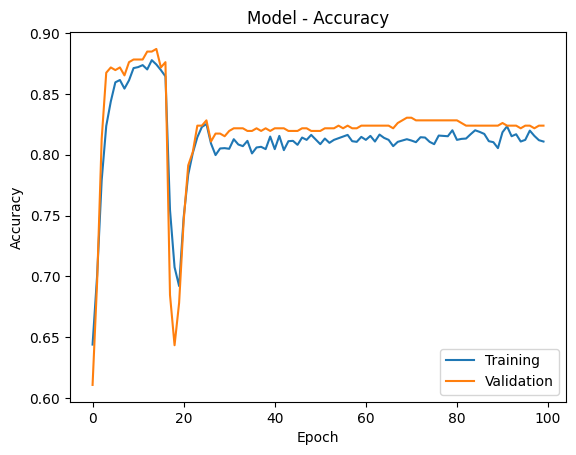

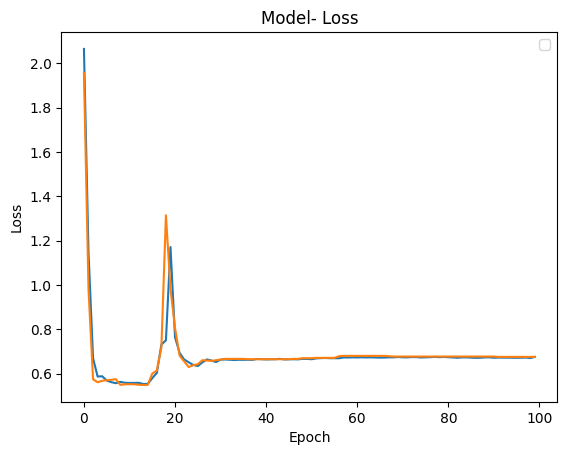

15/15 [==============================] - 0s 2ms/step


In [ ]:
# Print validation accuracy and plot accuracy and loss
evaluate_model(history2,data_test,label_test,model1)
y_pred=model2.predict(data_test)

In [ ]:
scores = model2.evaluate((data_test),label_test, verbose=0)
acc_CNN = scores[1]


# 3. Long-Short Term Memory(LSTM)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Computers are great at solving algorithmic and math problems, but often the world can't easily be defined with a mathematical algorithm. Facial recognition and language processing are a couple of examples of problems that can't easily be quantified into an algorithm, however these tasks are trivial to humans. The key to Artificial Neural Networks is that their design enables them to process information in a similar way to our own biological brains, by drawing inspiration from how our own nervous system functions. This makes them useful tools for solving problems like facial recognition, which our biological brains can do easily.

In [ ]:
# Define Bidirectional LSTM model
def network_LSTM(X_train,y_train):
    im_shape=(X_train.shape[1],1)
    inputs_lstm=Input(shape=(im_shape), name='inputs_lstm')

    dense = Dense(units=32, activation='relu', name='dense')(inputs_lstm)
    lstm = layers.Bidirectional(LSTM(units=128, name='lstm'))(dense)
    dropout = Dropout(0.3)(lstm)
    batch_normalization = BatchNormalization(name='batch_normalization')(dropout)
    dense_1 = Dense(units=64, activation='relu', name='dense_1')(batch_normalization)
    dropout_2 = Dropout(0.3, name='dropout_2')(dense_1)
    batch_normalization_1 = BatchNormalization(name='batch_normalization_1')(dropout_2)
    main_output = Dense(units=2, activation='softmax')(batch_normalization_1)

    model = Model(inputs= inputs_lstm, outputs=main_output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

    return(model)

In [ ]:
# Define BiLSTM model to be trained on epileptic vs healthy data
model3 = network_LSTM(data_train, label_train)
print(model3.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_lstm (InputLayer)    [(None, 178, 1)]          0         
                                                                 
 dense (Dense)               (None, 178, 32)           64        
                                                                 
 bidirectional (Bidirectiona  (None, 256)              164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                1644

In [ ]:
# Train BiLSTM on epileptic vs healthy data
# Save model at highest validation accuracy
save_path = '/tmp/checkpoint_3'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=save_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3 = model3.fit(data_train, label_train,epochs=100, batch_size=32, validation_data=(data_val,label_val), callbacks=[model_checkpoint_callback])

Epoch 1/100
115/115 [==============================] - 9s 25ms/step - loss: 0.2327 - accuracy: 0.9041 - val_loss: 0.1579 - val_accuracy: 0.9435
Epoch 2/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1491 - accuracy: 0.9527 - val_loss: 0.1844 - val_accuracy: 0.9435
Epoch 3/100
115/115 [==============================] - 2s 18ms/step - loss: 0.1306 - accuracy: 0.9571 - val_loss: 0.1360 - val_accuracy: 0.9565
Epoch 4/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1198 - accuracy: 0.9601 - val_loss: 0.1189 - val_accuracy: 0.9609
Epoch 5/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1064 - accuracy: 0.9639 - val_loss: 0.1238 - val_accuracy: 0.9609
Epoch 6/100
115/115 [==============================] - 2s 16ms/step - loss: 0.1068 - accuracy: 0.9620 - val_loss: 0.1175 - val_accuracy: 0.9609
Epoch 7/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1082 - accuracy: 0.9666 - val_loss: 0.1221 - val_accuracy:

Accuracy: 97.83%


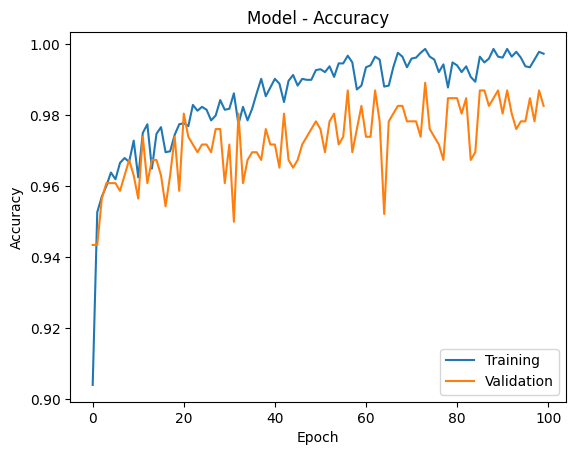

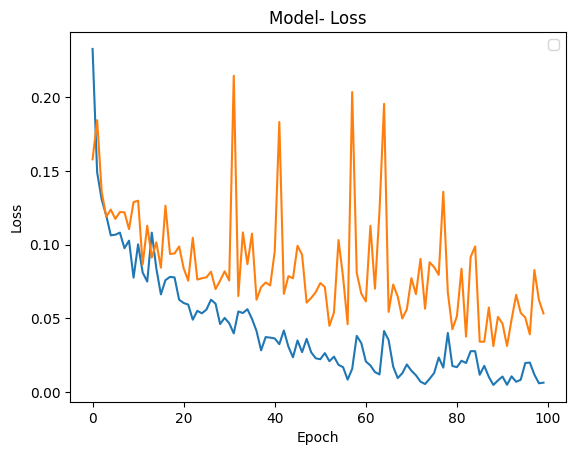

15/15 [==============================] - 1s 7ms/step


In [ ]:
# Print validation accuracy and plot accuracy and loss
evaluate_model(history3,data_test,label_test,model3)

Accuracy: 97.83%


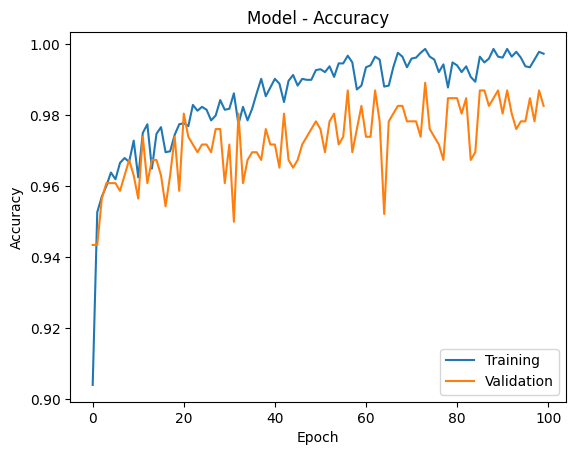

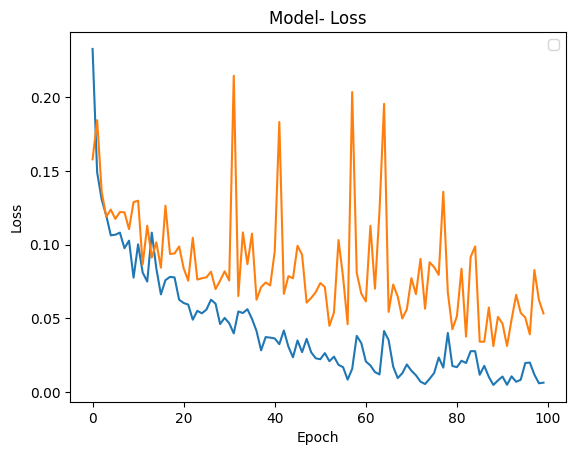

15/15 [==============================] - 0s 7ms/step


In [ ]:
# Print validation accuracy and plot accuracy and loss for the model's best version
model3.load_weights(save_path)
evaluate_model(history3,data_test,label_test,model3)

In [ ]:
scores = model3.evaluate((data_test),label_test, verbose=0)
acc_LSTM = scores[1]


# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': ['ANN', 'CNN','LSTM'],

    'Score': [acc_ANN, acc_CNN,acc_LSTM ]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,LSTM,0.978261
0,ANN,0.910870
1,CNN,0.802174


# Export Model

In [ ]:
import joblib


In [ ]:
# export moddel
joblib.dump(model3, 'model.pkl')

['model.pkl']

In [ ]:
model3.save('model3')

# Conclusion
The aim of this study is to detect epileptic seizure using three different
 deep learning algorithms.